# Softmax(Application)

**Softmax Algorithm:**

输入:样本数据$X=\{x_1,x_2,...,x_m\}$,样本标签$Y=\{y_1,y_2,...,y_m\}$,其中每个样本$x_i$有n个特征.每个标签$y_i\in \{1,2,...,C\}$,学习率$\alpha$

输出:样本预测标签$\hat{Y}$

(1) 将样本标签转换成"Hot"形式:$Y=\begin{bmatrix}
1 &0  &...  &0 \\ 
 0&1  &...  &0 \\ 
... & ... & ... &... \\ 
 0&0  &...  & 1
\end{bmatrix}_{C,N}$,即对应的类别为1,其余为0.初始化$W,b$

(2) 计算线性值$Z=WX+b$

(3) 计算预测值$A=softmax(Z)$

(4) 计算损失函数$loss(w,b)= -\frac{1}{m}\cdot \sum_{i=1}^{m}y_ilog\hat{y_i}$

(5) 更新参数:
    
$W{:=}W-\alpha dW$
    
$b:=W =\alpha db$

(6) 在损失精度阈值$\epsilon$内退出迭代,即$|loss^{k+1}-loss^{k}|<\epsilon$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

### 1 load data set

我们继续使用LR的数据,不过这里的分类是3类.

In [2]:
def loadData_iris():
    """
    Returns:
    --------
        X:have two dimensions (sepal length and width).
        Y:labels.
    """
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    Y = iris.target
    return X,Y

In [3]:
X,Y = loadData_iris()

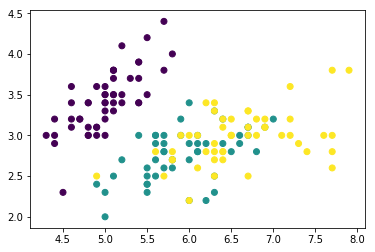

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)

可以看出图中有三个分类,分别是黄色,绿色和紫色.

#### 1.1 Split data set

同样,我们将数据集拆分为训练样本和测试样本,

其中训练样本的形状为(m,n),样本标签为(m,),m:样本数量,n:样本特征.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 2 One-Hot

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then you might have the following y vector which you will need to convert as follows:
![](picture/66.png)

This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). To do this conversion in numpy, you might have to write a few lines of code. In numpy, you can use one line of code:
- np.eye()

In [6]:
def Hot(Y,classes):
    """
    change to "One-Hot"
    
    Return:
    ------
        one hot.
    """
    return np.eye(classes)[Y.ravel()].T

In [7]:
y = Hot(y_train,3)
print(y.shape)

(3, 120)


可以看出y_train由原来的(m,)转为(classes,m),即:

3:每一行代表一个分类.

120:代表120个数据标签.

### 3 Initialization Parameters

初始化参数,我们需要来讨论一下维度.

最终$A$的形状一定是和$Y$的形状一致记为(classes,m)

所以$Z$的形状也是和$A$一致,因为softmax并不改变形状.

所以$WX$的形状也是(classes,m),那么$X$的形状是(m,n),定义$W$的形状是(classes,n)

那么计算$Z=WX$的时候就不需要任何矩阵转置.

另外,因为现在是多分类,所以$b$的形状是(classes,1),可以提现为一个超平面有一个截距,这里有classes个超平面.

**Ps:**

classes:分类的个数

In [8]:
def initial(n,classes):
    """
    initialization parameters
    
    Returns:
    -------
        W:weights
        b:bias
    """
    np.random.seed(1)
    W = np.random.rand(classes,n)
    b = np.zeros((classes,1))
    
    return W,b

### 4 softmax

在定义softmax的时候一定要指定

```python
np.sum(t,axis=0)  ```

因为每一行代表一个类,axis=0指定行之间的操作.这样才能提现分概率求和为1.

In [9]:
def softmax(Z):
    """
    create softmax.
    
    Parameters:
    ----------
        Z:liner value
    Return:
    ------
        res: softmax value.
    """
    t = np.exp(Z)
    res = t / np.sum(t,axis=0)  
    return res
    

###  5 Build softmax model

这里没有使用正则化,因为此内容主要是讲解softmax,如果需要,可以加上正则化.

In [10]:
def Softmax_model(X,Y,classes,alpha,Iter,is_print=False):
    """
    Implementation softmax model.
    
    Parameters:
    ----------
        X: training data set.
        Y: training labels
        classes: number of classes
        alpha: learning rate
        Iter: number of iterative
        is_print: is print loss value
        
    Returns:
    -------
        W: weights
        b: bias
        cost : loss value.
    
    """
    m,n = X.shape
    W,b = initial(n,classes)
    cost = []
    
    for iter_ in range(Iter):

        Z = np.dot(W,X.T) + b
        A = softmax(Z)
        
        
        loss = - np.sum(Y*np.log(A)) / m
            
        cost.append(loss)
        
        if is_print and iter_ % 10==0:
            print("Iter:{},loss:{}".format(iter_,loss))
            
        dZ = A - Y
        
        dW = np.dot(dZ,X)/m
        
        assert dW.shape == W.shape  # Make sure the shape is rigth.
        
        db = np.sum(dZ,axis=1,keepdims=True) /m
        
        assert db.shape == b.shape 
        
        # Update parameters.
        
        W = W - alpha * dW
        b = b - alpha * db
        
    return W,b,cost 

In [11]:
Y = Hot(y_train,3) # change to hot 
W,b,cost  = Softmax_model(X=X_train,Y=Y,classes=3,alpha=0.1,Iter=1000)

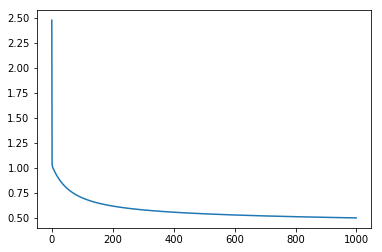

In [12]:
plt.plot(cost)

可以看出损失率是逐步下降的,下降到0.5左右就下降的比较慢了.可以相应的去调节超级参数$\alpha$和$Iter$.以达到更好的效果.

一般来说,这里已经很难再下降了,如果将代码稍作改变你和重复,引用神经网络,那么效果会有显著的提高.

### 6 Predicted 


我们需要使用
```python

np.argmax(A,axis=0)```
将概率最大的值的索引拿出来,就相当于划分的类.

In [13]:
def Predict(X,Y,W,b):
    """
    Predict labels
    
    Parameters:
    ----------
        X:test set
        Y:test labels
        W:weights
        b: bias.
    Return:
    ------
        accurate: correct rate
    """
    Z = np.dot(W,X.T) + b
    A = softmax(Z)
    
    predict_y = np.argmax(A,axis=0)
    
    accurate = (predict_y == Y).sum() / Y.shape[0]
    
    return accurate

In [14]:
accurate = Predict(X_test,y_test,W,b)
print('The test set correct rate is :',accurate)

The test set correct rate is : 0.9


In [15]:
accurate = Predict(X_train,y_train,W,b)
print('The traing set correct rate is :',accurate)

The traing set correct rate is : 0.7833333333333333


### 7 Scikit-learn

同样可以使用scikit-learn中的[LogisticRegression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)来进行尝试.

In [16]:
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
predict_y = logreg.predict(X_test)
accurate = (predict_y == y_test).sum() / y_test.shape[0]
print('Thet test correct rate is :',accurate)

Thet test correct rate is : 0.9


In [18]:
predict_y = logreg.predict(X_train)
accurate = (predict_y == y_train).sum() / y_train.shape[0]
print('Thet train correct rate is :',accurate)

Thet train correct rate is : 0.8
